In [1]:
import os
os.chdir("../src")

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import data_cleaning as cleaner
plt.style.use('bmh')

In [4]:
df = pd.read_csv("../data/clean_train.csv",low_memory=False)

In [5]:
df = df.dropna()

In [6]:
# Checking the missing values
df.isnull().sum()

fico              0
flag_fthb         0
cd_msa            0
mi_pct            0
cnt_units         0
occpy_sts         0
cltv              0
dti               0
orig_upb          0
ltv               0
int_rt            0
channel           0
ppmt_pnlty        0
prod_type         0
st                0
prop_type         0
zipcode           0
id_loan           0
loan_purpose      0
orig_loan_term    0
cnt_borr          0
seller_name       0
servicer_name     0
flag_sc           0
pgrm_ind          0
rel_ref_ind       0
prop_val_meth     0
int_only_ind      0
TARGET            0
dtype: int64

In [7]:
df_test = pd.read_csv("../data/clean_test.csv",low_memory=False)

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_test_num = df_test.select_dtypes(include = ['float64', 'int64'])

In [9]:
df_features_train = pd.read_csv("../data/features_train_no-dummies.csv",low_memory="False")
df_features_test = pd.read_csv("../data/features_test_no-dummies.csv",low_memory="False")

In [10]:
df_features_train = df_features_train.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111949 entries, 0 to 149984
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fico            111949 non-null  float64
 1   flag_fthb       111949 non-null  int64  
 2   cd_msa          111949 non-null  float64
 3   mi_pct          111949 non-null  int64  
 4   cnt_units       111949 non-null  int64  
 5   occpy_sts       111949 non-null  object 
 6   cltv            111949 non-null  float64
 7   dti             111949 non-null  float64
 8   orig_upb        111949 non-null  int64  
 9   ltv             111949 non-null  float64
 10  int_rt          111949 non-null  float64
 11  channel         111949 non-null  object 
 12  ppmt_pnlty      111949 non-null  int64  
 13  prod_type       111949 non-null  object 
 14  st              111949 non-null  object 
 15  prop_type       111949 non-null  object 
 16  zipcode         111949 non-null  int64  
 17  id_loan   

In [12]:
df.head()

,fico,flag_fthb,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,...,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,pgrm_ind,rel_ref_ind,prop_val_meth,int_only_ind,TARGET
0,726.0,0,47260.0,0,1,P,66.0,36.0,234000,66.0,...,360,2,QUICKEN LOANS INC.,Other servicers,0,9,0,9,0,0
1,794.0,0,36084.0,0,1,P,76.0,26.0,413000,76.0,...,360,1,Other sellers,FREEDOM MORTGAGE CORPORATION,0,9,0,9,0,0
2,767.0,1,36740.0,0,1,P,80.0,37.0,207000,80.0,...,360,1,BRANCH BANKING & TRUST COMPANY,TRUIST BANK,0,9,0,9,0,0
4,802.0,0,14860.0,0,1,P,35.0,10.0,165000,35.0,...,180,2,Other sellers,Other servicers,0,9,0,9,0,0
5,786.0,0,22020.0,0,1,P,64.0,31.0,220000,64.0,...,180,1,Other sellers,Other servicers,0,9,0,9,0,0


In [13]:
df.describe(include ='all')

,fico,flag_fthb,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,...,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,pgrm_ind,rel_ref_ind,prop_val_meth,int_only_ind,TARGET
count,111949.000000,111949.000000,111949.000000,111949.000000,111949.000000,111949,111949.000000,111949.00000,111949.000000,111949.000000,...,111949.000000,111949.000000,111949,111949,111949.000000,111949,111949.0,111949.0,111949.0,111949.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,34,34,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,P,NaN,NaN,NaN,NaN,...,NaN,NaN,Other sellers,Other servicers,NaN,9,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99808,NaN,NaN,NaN,NaN,...,NaN,NaN,38430,33373,NaN,111744,NaN,NaN,NaN,NaN
mean,753.909816,0.177911,30320.350285,6.089058,1.029478,NaN,74.034632,33.50490,229063.841571,73.402925,...,317.172337,1.524516,NaN,NaN,0.043806,NaN,0.0,9.0,0.0,0.006280
std,43.202049,0.390758,11278.717184,11.352955,0.229780,NaN,16.536504,9.36355,119798.137268,16.661089,...,76.058785,0.499401,NaN,NaN,0.204663,NaN,0.0,0.0,0.0,0.078995
min,600.000000,0.000000,10180.000000,0.000000,1.000000,NaN,6.000000,1.00000,13000.000000,6.000000,...,96.000000,1.000000,NaN,NaN,0.000000,NaN,0.0,9.0,0.0,0.000000
25%,724.000000,0.000000,19340.000000,0.000000,1.000000,NaN,66.000000,27.00000,136000.000000,65.000000,...,350.000000,1.000000,NaN,NaN,0.000000,NaN,0.0,9.0,0.0,0.000000
50%,763.000000,0.000000,31540.000000,0.000000,1.000000,NaN,79.000000,35.00000,206000.000000,78.000000,...,360.000000,2.000000,NaN,NaN,0.000000,NaN,0.0,9.0,0.0,0.000000
75%,789.000000,0.000000,40060.000000,0.000000,1.000000,NaN,84.000000,41.00000,304000.000000,80.000000,...,360.000000,2.000000,NaN,NaN,0.000000,NaN,0.0,9.0,0.0,0.000000


In [14]:
df['TARGET'].value_counts(normalize=True)

0    0.99372
1    0.00628
Name: TARGET, dtype: float64

/home/leon/causal-relationships/.env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


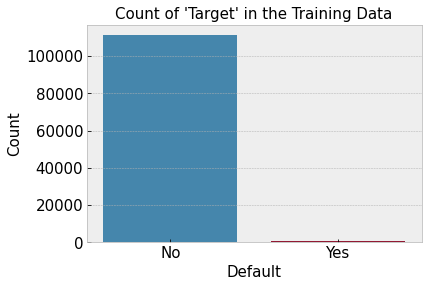

In [15]:
# visualize the target variable #  Class Imbalance
g = sns.countplot(df['TARGET'])
g.set_xticklabels(['No','Yes'])
g.axes.set_title("Count of 'Target' in the Training Data",fontsize=15)
g.set_xlabel("Default",fontsize=15)
g.set_ylabel("Count",fontsize=15)
g.tick_params(labelsize=15)
plt.savefig("../out/img/classimbalance.png", bbox_inches='tight')
plt.show()

In [16]:
from matplotlib.pyplot import figure

In [17]:
#CORRELATION with TARGET#
df_num_corr = df_num.corr()['TARGET'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.025].sort_values(ascending=False)
print("There is {} strongly correlated values with TARGET:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with TARGET:
int_rt      0.041690
dti         0.030071
mi_pct      0.027733
cnt_borr   -0.036169
fico       -0.081949
Name: TARGET, dtype: float64


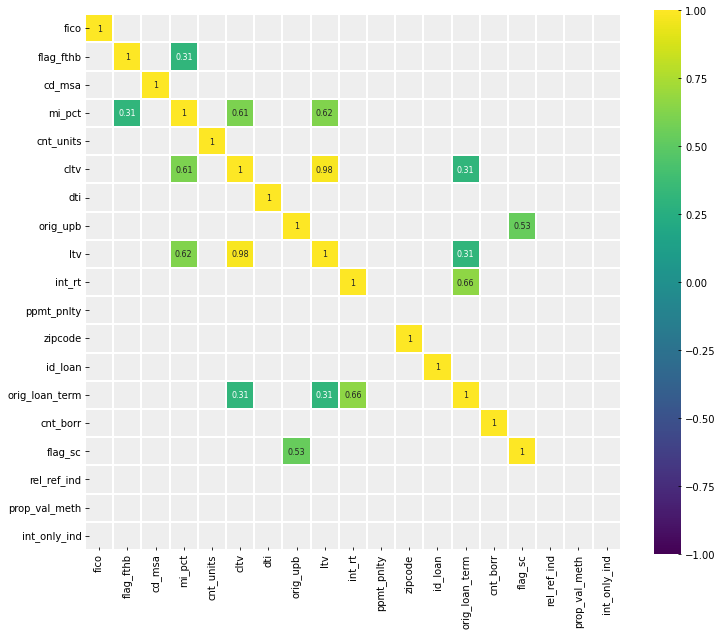

In [18]:
#Feature Correlation Matrix
corr = df_num.drop('TARGET', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [19]:
# Let's calculate the percentage of each seller name
df.seller_name.value_counts(normalize=True)


Other sellers                                                 0.343281
WELLS FARGO BANK, N.A.                                        0.125718
JPMORGAN CHASE BANK, N.A.                                     0.083690
U.S. BANK N.A.                                                0.065280
BANK OF AMERICA, N.A.                                         0.065155
BRANCH BANKING & TRUST COMPANY                                0.050452
QUICKEN LOANS INC.                                            0.037964
CALIBER HOME LOANS, INC.                                      0.022466
FRANKLIN AMERICAN MORTGAGE COMPANY                            0.021251
PENNYMAC CORP.                                                0.019813
CITIMORTGAGE, INC.                                            0.017803
FLAGSTAR BANK, FSB                                            0.016222
UNITED SHORE FINANCIAL SERVICES, LLC., DBA SHORE MORTGAGE     0.015203
LOANDEPOT.COM, LLC                                            0.014784
SUNTRU

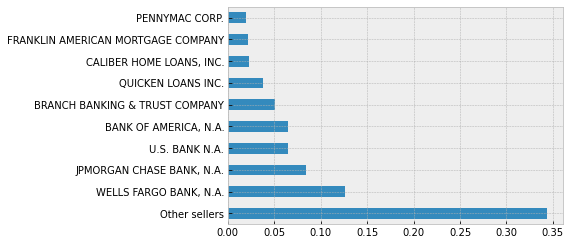

In [20]:
#plot the bar graph of percentage sellername
df.seller_name.value_counts(normalize=True).head(10).plot.barh()

plt.show()

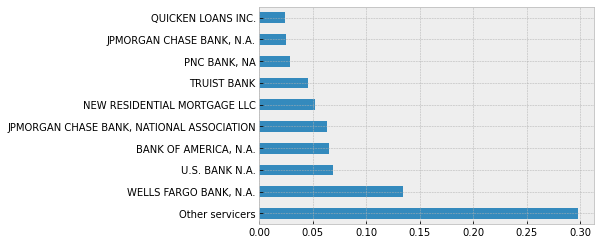

In [21]:
#plot the bar graph of percentage servicer name
df['servicer_name'].value_counts(normalize=True).head(10).plot(kind="barh")
plt.show()

In [22]:
#Describe Credit Score for Default Loan
df[df["TARGET"]==1]['fico'].describe()

count    703.000000
mean     709.374111
std       45.125349
min      605.000000
25%      676.500000
50%      707.000000
75%      741.000000
max      817.000000
Name: fico, dtype: float64

In [23]:
#Describe Credit Score for w/o Default Loan
df[df["TARGET"]==0]['fico'].describe()

count    111246.000000
mean        754.191252
std          43.043566
min         600.000000
25%         725.000000
50%         763.000000
75%         789.000000
max         840.000000
Name: fico, dtype: float64

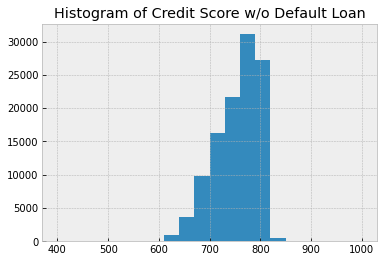

In [24]:
df[df["TARGET"]==0].hist(column='fico',range=(400,1000),bins=20)
plt.title('Histogram of Credit Score w/o Default Loan')
plt.savefig("../out/img/credscorehist_withoutdefault.png")

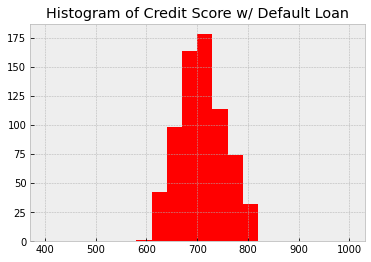

In [25]:
df[df["TARGET"]==1].hist(column='fico',range=(400,1000),bins=20,color="red")
plt.title('Histogram of Credit Score w/ Default Loan')
plt.savefig("../out/img/credscorehist_withdefault.png")

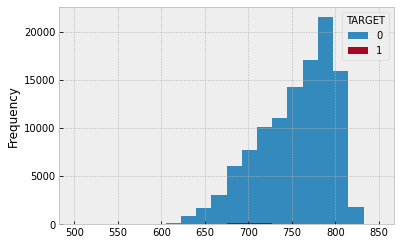

In [26]:
#Default vs. Non-Default in Same Histogram
df.pivot(columns="TARGET", values="fico").plot.hist(bins=20,range=(500,850))

plt.show()

In [27]:
df['cnt_units'].value_counts(normalize=True) #Denotes whether the mortgage is a one-, two-, three-, or four-unit property.

1    0.979714
2    0.013997
3    0.003385
4    0.002903
Name: cnt_units, dtype: float64

In [28]:
df['occpy_sts'].value_counts(normalize=True) #  Denotes whether the mortgage type is owner occupied, second home, or investment property.

P    0.891549
I    0.077794
S    0.030657
Name: occpy_sts, dtype: float64

Text(0.5, 1.0, 'Histogram of Interest Rate')

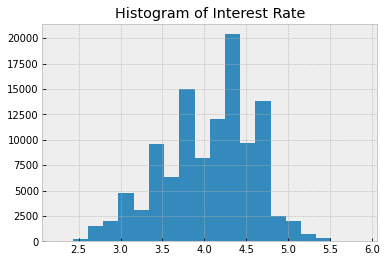

In [29]:
## INTEREST RATE
df.hist(column='int_rt',bins=20)
plt.title('Histogram of Interest Rate')

In [30]:
#mean interest rate 
df[['int_rt','TARGET']].groupby('TARGET').mean().sort_values(by='int_rt').round(2)

,int_rt
TARGET,
0,4.05
1,4.33


In [31]:
#Recoding of R, C, B into long versions 
rcb = ["R","C","B"]
rcb_long = ["Retailer", "Correspondent", "Broker"]

df['channel'] = df['channel'].replace(rcb, rcb_long)

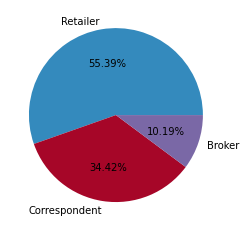

In [32]:
plt.pie(df['channel'].value_counts(), labels= df['channel'].unique(), autopct='%1.2f%%') # B: Broker, C: Correspondent, R= Retailer
plt.show()

In [33]:
#Recoding of P,N,C into long versions 
pnc = ["P","N","C"]
pnc_long = ["Purchase", "No Cash-Out Refinance", "Cash-out Refinance"]

df['loan_purpose'] = df['loan_purpose'].replace(pnc, pnc_long)

<AxesSubplot:xlabel='loan_purpose', ylabel='count'>

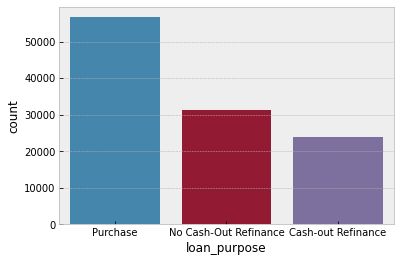

In [34]:
sns.countplot(x='loan_purpose', data=df,
             order = df['loan_purpose'].value_counts().index)

In [35]:
df['loan_purpose'].value_counts() #Indicates whether the mortgage loan is a 
#C=Cash- out Refinance mortgage, N= No Cash-out Refinance mortgage, P= Purchase mortgage.

Purchase                 56681
No Cash-Out Refinance    31308
Cash-out Refinance       23960
Name: loan_purpose, dtype: int64

In [36]:
df['zipcode'].value_counts(normalize=True)

94500    0.015587
75000    0.013336
30000    0.009853
60600    0.009067
85200    0.008959
           ...   
39800    0.000009
75900    0.000009
17900    0.000009
30400    0.000009
78800    0.000009
Name: zipcode, Length: 714, dtype: float64

In [37]:
#Recoding of Property Types
proptype = ["CO","PU","CP","MH","SF"]
proptype_long = ["Condominium", "Planned unit development", "Cooperative share","Manufactured home","Single-Family Home"]

df['prop_type'] = df['prop_type'].replace(proptype, proptype_long)

In [38]:
df['prop_type'].value_counts() #Denotes whether the property type secured by the mortgage is 
#CO=condominium, PU= planned unit development (PUD), 
#CP= cooperative share, MH= manufactured home, SF=Single-Family home.

Single-Family Home          70746
Planned unit development    31933
Condominium                  8753
Cooperative share             289
Manufactured home             228
Name: prop_type, dtype: int64

<AxesSubplot:xlabel='loan_purpose'>

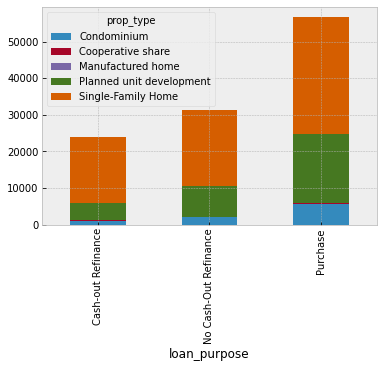

In [39]:
df.groupby(['loan_purpose', 'prop_type']).size().unstack().plot(kind='bar', stacked=True)

In [40]:
purpose_type_cross = pd.crosstab(index=df["loan_purpose"], 
                            columns=df["prop_type"],
                             margins=True)


In [41]:
purpose_type_cross

prop_type,Condominium,Cooperative share,Manufactured home,Planned unit development,Single-Family Home,All
loan_purpose,,,,,,
Cash-out Refinance,1070,50,38,4750,18052,23960
No Cash-Out Refinance,2030,50,63,8280,20885,31308
Purchase,5653,189,127,18903,31809,56681
All,8753,289,228,31933,70746,111949


In [42]:
purpose_type_cross.columns = ["Condominium","Cooperative share","Manufactured home","Planned unit development","Single-Family Home","rowtotal"]
purpose_type_cross.index = ['Cash-out Refinance', 'No Cash-Out Refinance', 'Purchase', 'coltotal']

In [43]:
purpose_type_cross/purpose_type_cross.loc["coltotal"]

,Condominium,Cooperative share,Manufactured home,Planned unit development,Single-Family Home,rowtotal
Cash-out Refinance,0.122244,0.173010,0.166667,0.148749,0.255166,0.214026
No Cash-Out Refinance,0.231920,0.173010,0.276316,0.259293,0.295211,0.279663
Purchase,0.645836,0.653979,0.557018,0.591958,0.449623,0.506311
coltotal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
purpose_type_cross.div(purpose_type_cross["rowtotal"],
                   axis=0)

,Condominium,Cooperative share,Manufactured home,Planned unit development,Single-Family Home,rowtotal
Cash-out Refinance,0.044658,0.002087,0.001586,0.198247,0.753422,1.0
No Cash-Out Refinance,0.064840,0.001597,0.002012,0.264469,0.667082,1.0
Purchase,0.099734,0.003334,0.002241,0.333498,0.561193,1.0
coltotal,0.078187,0.002582,0.002037,0.285246,0.631948,1.0


In [45]:
df['st'].value_counts(normalize=True).head(10) 
# A two-letter abbreviation indicating the state or territory within which the property securing the mortgage is located.
#CA-TX-FL

CA    0.166227
TX    0.076026
FL    0.060349
IL    0.046807
NY    0.037562
OH    0.032006
PA    0.031684
VA    0.031371
MI    0.030523
NC    0.030514
Name: st, dtype: float64

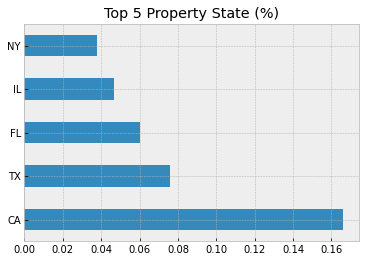

In [46]:
#plot the bar graph of percentage sellername
df.st.value_counts(normalize=True).head(5).plot.barh().set_title('Top 5 Property State (%)')

plt.show()

In [47]:
df_num.corr()['TARGET'][:-1].sort_values()

fico             -0.081949
cnt_borr         -0.036169
orig_upb         -0.009672
zipcode          -0.009575
flag_sc          -0.005412
cnt_units        -0.004293
cd_msa           -0.001099
id_loan           0.002349
flag_fthb         0.017921
orig_loan_term    0.020267
ltv               0.023746
cltv              0.023890
mi_pct            0.027733
dti               0.030071
int_rt            0.041690
ppmt_pnlty             NaN
rel_ref_ind            NaN
prop_val_meth          NaN
int_only_ind           NaN
Name: TARGET, dtype: float64

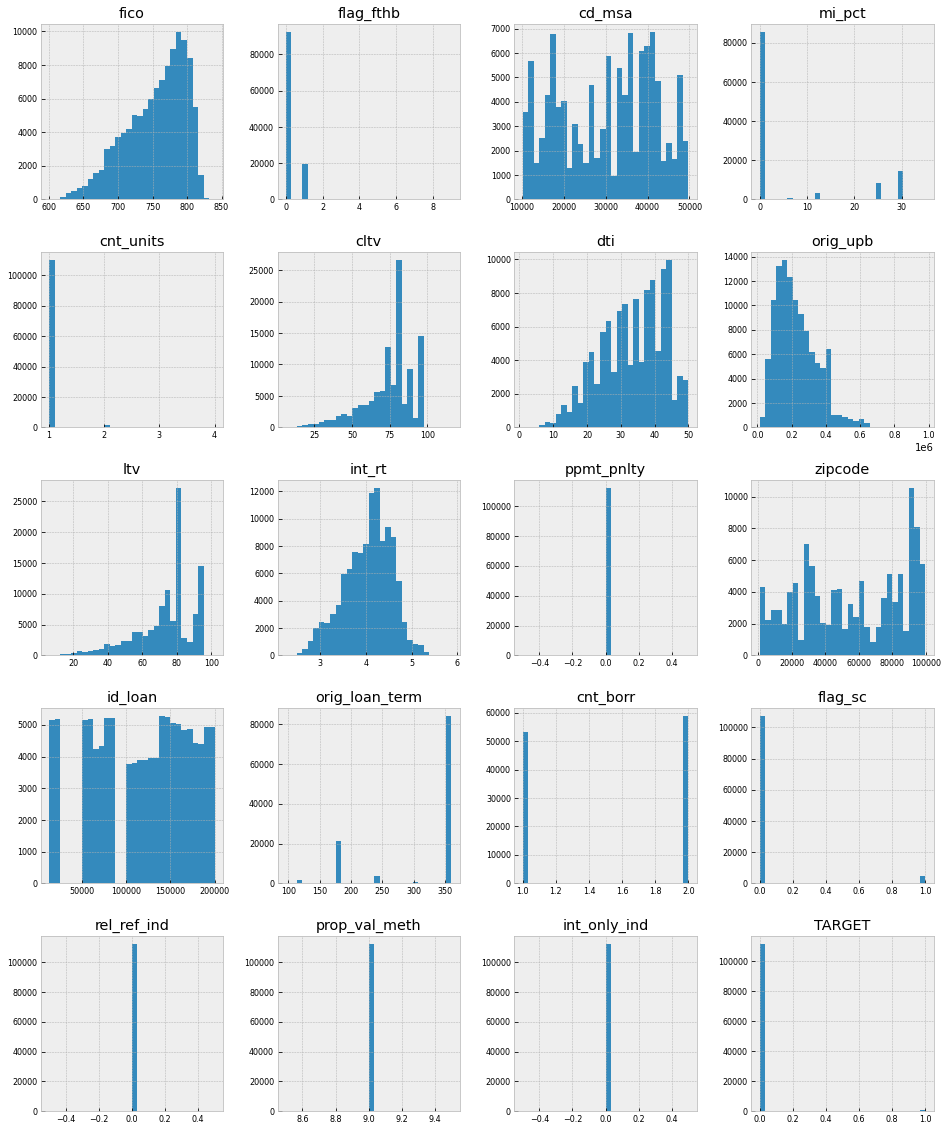

In [48]:
df_num.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8);

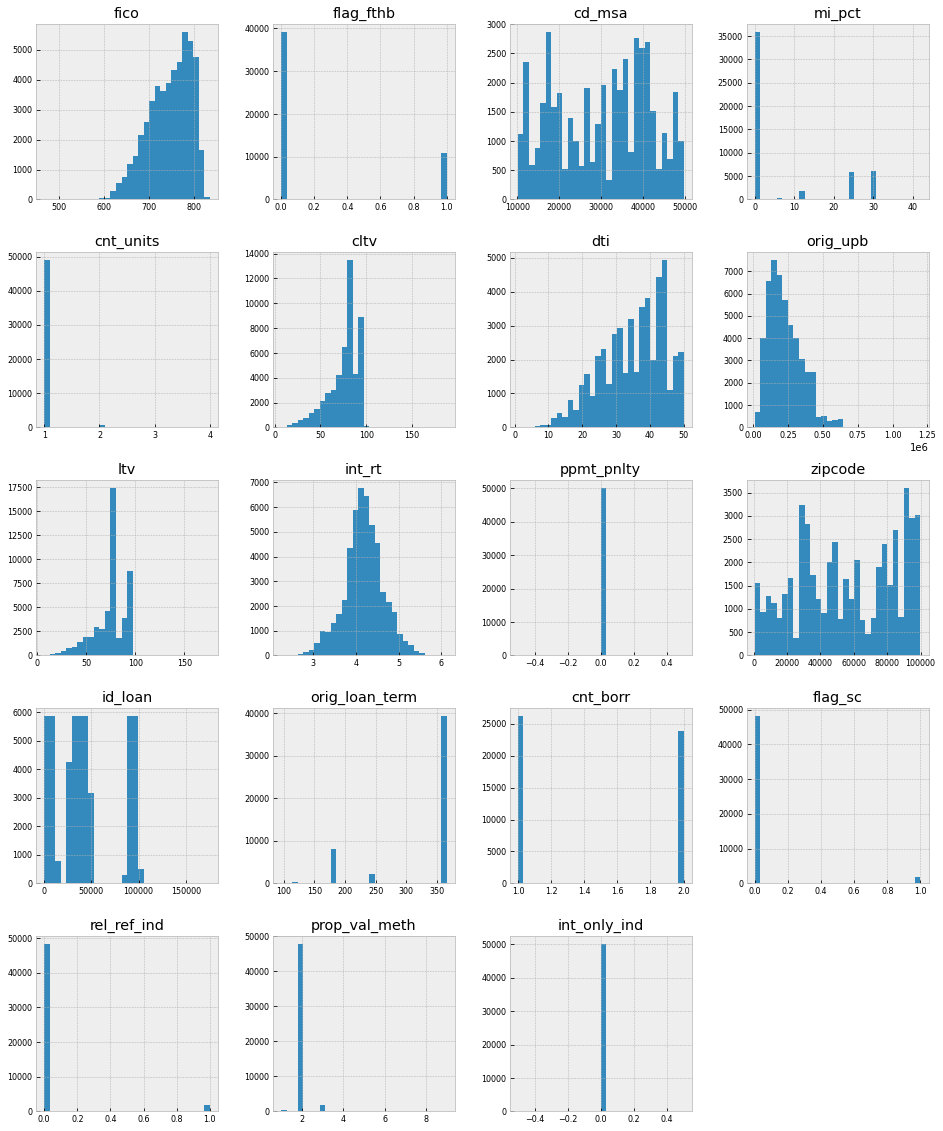

In [49]:
df_test_num.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8);

In [50]:
from scipy.stats import ks_2samp
import numpy as np

## Kolmogorov-Smirnov test ##
#Under the null hypothesis the two distributions are identical. #
# LOW P-VALUE MEANS THEY ARE NOT IDENTICAL #

In [51]:
for i in df_features_test.columns:
    print(ks_2samp(df_features_train[i], df_features_test[i]), "KS Test for feature", i)

KstestResult(statistic=0.6587172788182767, pvalue=0.0) KS Test for feature id_loan
KstestResult(statistic=0.07977446553472478, pvalue=1.192425917826211e-197) KS Test for feature fico
KstestResult(statistic=0.04819090877406346, pvalue=2.445482419218764e-72) KS Test for feature flag_fthb
KstestResult(statistic=0.03315811859415774, pvalue=1.828838893073729e-34) KS Test for feature cd_msa
KstestResult(statistic=0.04850380263839327, pvalue=2.8255598145498912e-73) KS Test for feature mi_pct
KstestResult(statistic=0.002688358510254618, pvalue=0.9583895697576611) KS Test for feature cnt_units
KstestResult(statistic=0.01726609497505771, pvalue=1.1767028026414668e-09) KS Test for feature occpy_sts
KstestResult(statistic=0.04744485863353998, pvalue=3.968295542168485e-70) KS Test for feature cltv
KstestResult(statistic=0.08527005242878488, pvalue=8.380119566530008e-226) KS Test for feature dti
KstestResult(statistic=0.03258968829787495, pvalue=2.6262804513956122e-33) KS Test for feature orig_upb
K

/home/leon/causal-relationships/.env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leon/causal-relationships/.env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


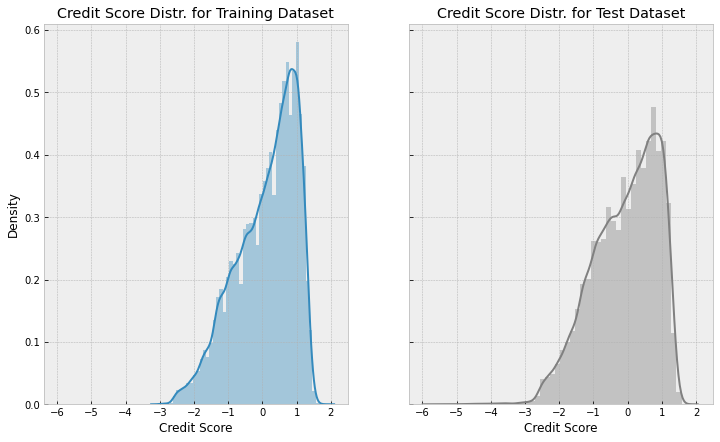

In [52]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True, figsize=(12, 7))
sns.distplot(df_features_train["fico"], axlabel="Credit Score",ax=axes[0]).set(title='Credit Score Distr. for Training Dataset')
sns.distplot(df_features_test["fico"], axlabel="Credit Score",color="grey",ax=axes[1]).set(title='Credit Score Distr. for Test Dataset')
plt.savefig("../out/img/creditscoredist.png", bbox_inches='tight')

/home/leon/causal-relationships/.env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leon/causal-relationships/.env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


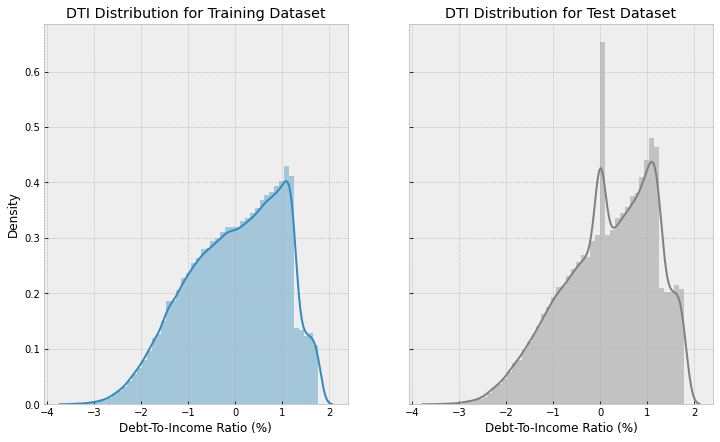

In [53]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True, figsize=(12, 7))
sns.distplot(df_features_train["dti"], axlabel="Debt-To-Income Ratio (%)",ax=axes[0]).set(title='DTI Distribution for Training Dataset')
sns.distplot(df_features_test["dti"], axlabel="Debt-To-Income Ratio (%)",color="grey",ax=axes[1]).set(title='DTI Distribution for Test Dataset')
plt.savefig("../out/img/dtidist.png", bbox_inches='tight')